In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('cba_texts_01072020.csv')
df2 = pd.read_csv('cba_clauses_dump_13032020.csv')
df3 = pd.read_csv('2021-01-04-dump_cbas -GeneralCBAData.csv')

In [16]:
CBA_with_start = df.merge(df3, left_on='cba_id', right_on='ID').loc[:,['cba_id','country', 'countrycode', 'locale', 'cbadate_start_date']]
CBA_with_start['cbadate_start_year'] = CBA_with_start['cbadate_start_date'].apply(lambda x: \
                                                                                  str(x).split('-')[0]).astype('float64')
bind_with_start_year = df2.merge(CBA_with_start, left_on='cba_id', \
                                 right_on='cba_id').loc[:,['cba_id', 'country_x', 'locale_x', 'bind', 'label', 'clause', 'cbadate_start_year']]


In [17]:
annuleav_labels = ['PAIDLEAV_trigger', 'holidaysdays', 'holidaysweeks', 'bankholidays1', 'bankholidays2','bankholidays2_0','bankholidays2_1','bankholidays2_2','bankholidays2_3','bankholidays2_4','holidaysfixed','holidaysfixeddays','holidaystxt']
overtime_labels = ['OVERTIME_trigger','overtimeallowancetype','overtimeallowancetype_general','overtimeallowanceperc1_general','overtimeallowanceamount1_general','overtimeallowancedays1_general','overtimeallowanceperc1','overtimeallowanceamount1','overtimeallowancedays1','overtimeallowancetype1','overtimeallowancetype2','overtimeallowancetype2_0','overtimeallowancetype2_1','overtimeallowancetype2_2','overtimeallowancetype2_3','overtimeallowancetype2_4','overtimeallowancetxt']



In [18]:
annuleav = bind_with_start_year.loc[bind_with_start_year['bind'].isin(annuleav_labels)].reset_index(drop=True)
overtime = bind_with_start_year.loc[bind_with_start_year['bind'].isin(overtime_labels)].reset_index(drop=True)
overtime['locale_x'] = overtime['locale_x'].apply(lambda x: x.split('_')[0])
annuleav['locale_x'] = annuleav['locale_x'].apply(lambda x: x.split('_')[0])

<AxesSubplot:>

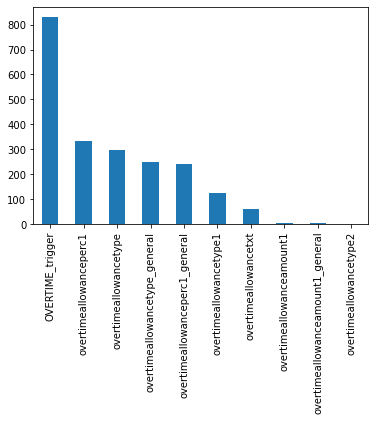

In [33]:
overtime['bind'].value_counts().plot(kind='bar')

<AxesSubplot:>

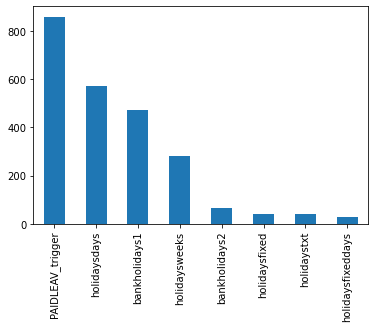

In [32]:
annuleav['bind'].value_counts().plot(kind='bar')

In [92]:
def most_freq(data, lang):
    vec = CountVectorizer(ngram_range=(1, 2), stop_words='english')
    target = data[data.locale_x == lang].clause
    X = vec.fit_transform(target.to_list())
    X = X.toarray().sum(axis=0)
    mapping = dict(zip(vec.get_feature_names(), X))
    most_freq = {k: v for k, v in sorted(mapping.items(), key=lambda item: item[1], reverse=True)}
    return most_freq

In [42]:
annuleav.iloc[0].clause

'Os  trabalhadores têm direito a um período de 23 dias úteis de férias remuneradas  em cada ano civil, acrescido de um dia de férias remunerado no caso do  trabalhador ter cinco ou mais anos de antiguidade, o qual se vence no dia 1 de  janeiro de cada ano civil, salvo o disposto na lei e nos números seguintes. '

In [94]:
most_freq(overtime, 'EN')

{'overtime': 754,
 'hours': 710,
 'shall': 573,
 'normal': 562,
 'time': 502,
 'rate': 484,
 'worked': 476,
 'hourly': 373,
 'work': 333,
 'hourly rate': 321,
 'employee': 310,
 'half': 289,
 'public': 287,
 'working': 280,
 'days': 259,
 'excess': 256,
 'day': 239,
 'holidays': 239,
 'week': 236,
 'public holidays': 229,
 'paid': 228,
 'hours worked': 212,
 'times': 203,
 'rates': 178,
 'time worked': 176,
 'double': 171,
 'shall paid': 166,
 'rest': 158,
 'overtime shall': 152,
 'normal working': 147,
 'excess normal': 142,
 'hours week': 142,
 'worked excess': 142,
 'pay': 139,
 'normal hourly': 138,
 'basic': 125,
 'following': 124,
 'gazetted': 115,
 'half times': 114,
 'follows': 112,
 'gazetted public': 111,
 'number': 105,
 'working hours': 104,
 'employees': 101,
 'number hours': 101,
 'time half': 101,
 'hour': 95,
 'following rates': 91,
 'payment': 91,
 'double time': 88,
 'agreement': 85,
 'clause': 84,
 'overtime work': 82,
 'times normal': 79,
 'rest days': 78,
 'holiday

In [63]:
overtime[overtime.locale_x == 'EN'].clause

12      III.Any extra classes organised by the school ...
13      (C) Overtime rates shall be as follows:\n\n\n\...
14      (C) Overtime rates shall be as follows:\n\n\n\...
15      (A) Employees requested by the employer or his...
16      a. Overtime work shall not be compulsory excep...
                              ...                        
1983    (2) An employer shall pay an employee as overt...
1984    (1) An employer shall pay for overtime in exce...
1985    (1) An employer shall pay for overtime in exce...
1986    (1) An employer shall pay for overtime in exce...
2130    13.5.4 An employee who is granted permission t...
Name: clause, Length: 409, dtype: object